In [56]:
# Importing The Basics
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# Path to the local copy of the shared collisions data
csv_path = '~/Desktop/02_Online_Courses/02_Coursera/01_IBM DataScience/09 Applied DS Capstone/04_Final/Data-Collisions.csv'

In [58]:
# Allocating df1 to the dataframe that reads the file
df1 = pd.read_csv(csv_path,low_memory=False)

In [59]:
# Getting a preview of the data
df1.head(10)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


In [60]:
#Understanding the shape
df1.shape

(194673, 38)

In [61]:
#Checking the data types
df1.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [62]:
#01 Exploring various columns that will be used in the ML Model
a = df1['ROADCOND'].isnull().sum(axis=0)
print('Empty cells:',a)
b = df1['ROADCOND'].value_counts()
print(b)
c = len(df1['ROADCOND'])
print('total:',c)

Empty cells: 5012
Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64
total: 194673


In [63]:
#02 Exploring various columns that will be used in the ML Model
d = df1['SPEEDING'].isnull().sum(axis=0)
e = df1['SPEEDING'].value_counts()
f = len(df1['SPEEDING'])
print('total counts:',f)
print(f'Yes counts:',e)
print(f'Blank counts:',d)

total counts: 194673
Yes counts: Y    9333
Name: SPEEDING, dtype: int64
Blank counts: 185340


In [64]:
#03 Exploring various columns that will be used in the ML Model
df1['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [65]:
#Looking at all the coloum values
print(df1.columns)

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')


In [66]:
#04 Exploring various columns that will be used in the ML Model
g = df1['SEVERITYDESC'].value_counts()
print(g)
h = df1['SEVERITYDESC'].isnull().sum(axis=0)
print('Empty cells:',h)

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64
Empty cells: 0


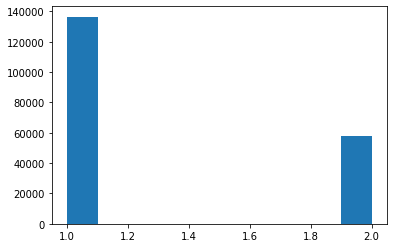

In [67]:
data = [df1.SEVERITYCODE]
plt.hist(data)
plt.show()

In [68]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [69]:
conda install seaborn

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [70]:
import seaborn as sns
sns.__version__

'0.9.0'

In [71]:
#05 Exploring various columns that will be used in the ML Model
i = df1['WEATHER'].isnull().sum(axis=0)
print('Empty cells:',i)
j = df1['WEATHER'].value_counts()
print(j)
k = len(df1['WEATHER'])
print('total:',k)

Empty cells: 5081
Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
total: 194673


In [72]:
#06 Exploring various columns that will be used in the ML Model
o = df1['LIGHTCOND'].isnull().sum(axis=0)
print('Empty cells:',o)
p = df1['LIGHTCOND'].value_counts()
print(p)
q = len(df1['LIGHTCOND'])
print('total:',q)

Empty cells: 5170
Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64
total: 194673


In [73]:
# 07 Exploring various columns that will be used in the ML Model
l=df1.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=False)
print(l)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1                  41
                          2                  15
Clear                     1               75295
                          2               35840
Fog/Smog/Smoke            1                 382
                          2                 187
Other                     1                 716
                          2                 116
Overcast                  1               18969
                          2                8745
Partly Cloudy             2                   3
                          1                   2
Raining                   1               21969
                          2               11176
Severe Crosswind          1                  18
                          2                   7
Sleet/Hail/Freezing Rain  1                  85
                          2                  28
Snowing                   1                 736
                          2                 171
U

In [74]:
# 08 Exploring various columns that will be used in the ML Model
m =df1.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=False)
print(m)

ROADCOND        SEVERITYCODE
Dry             1               84446
                2               40064
Ice             1                 936
                2                 273
Oil             1                  40
                2                  24
Other           1                  89
                2                  43
Sand/Mud/Dirt   1                  52
                2                  23
Snow/Slush      1                 837
                2                 167
Standing Water  1                  85
                2                  30
Unknown         1               14329
                2                 749
Wet             1               31719
                2               15755
Name: SEVERITYCODE, dtype: int64


In [75]:
# 09 Exploring various columns that will be used in the ML Model
n=df1.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts(normalize=False)
print(n)

SPEEDING  SEVERITYCODE
Y         1               5802
          2               3531
Name: SEVERITYCODE, dtype: int64


In [76]:
# Finalizng the factors that will be used for the ML Model - feature as well as the results
## Not the final feature dataframe but being used to focus on the data that will be used
df2 = df1[['WEATHER','ROADCOND','LIGHTCOND','SPEEDING','SEVERITYCODE']]
df2.head(15)

,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,Overcast,Wet,Daylight,NaN,2
1,Raining,Wet,Dark - Street Lights On,NaN,1
2,Overcast,Dry,Daylight,NaN,1
3,Clear,Dry,Daylight,NaN,1
4,Raining,Wet,Daylight,NaN,2
5,Clear,Dry,Daylight,NaN,1
6,Raining,Wet,Daylight,NaN,1
7,Clear,Dry,Daylight,NaN,2
8,Clear,Dry,Daylight,NaN,1
9,Clear,Dry,Daylight,NaN,2


In [77]:
# Understanding the shape
df2.shape

(194673, 5)

In [78]:
# Replacing NaN from Speeding to 'N'
df2['SPEEDING'].replace(np.nan,'N',inplace=True)
df2.head()

/Users/tarunabichandani/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,Overcast,Wet,Daylight,N,2
1,Raining,Wet,Dark - Street Lights On,N,1
2,Overcast,Dry,Daylight,N,1
3,Clear,Dry,Daylight,N,1
4,Raining,Wet,Daylight,N,2


In [79]:
# Creating a dataframe that will help in the next step to understand how many values are missing from
# each column
missing_data = df2.isnull()
missing_data.head(10)

,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [80]:
# Finding missing values in the missing dataset to understand what can be done
# TRUE - Value missing, FALSE - value present
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

SPEEDING
False    194673
Name: SPEEDING, dtype: int64

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64



In [81]:
# In all three cases (ROADCOND, WEATHER, LIGHTCOND), less than 2.5% data is missing and\
# hence it should be acceptable to drop those rows from the dataset
# a) because only 63% of the ROADCOND data is DRY, 24% is WET, hence cannot replace missing data with Dry #refer #01
# b) because only 57% of the WEATHER is clear, no majority %age of any WEATHER #refer #05
# c) because only 59% of the LIGHTCOND is DAYLIGHT, no majority %age of any LIGHTCOND #refer #06

df2.dropna(subset=["ROADCOND"],axis=0,inplace=True)
df2.dropna(subset=["WEATHER"],axis=0,inplace=True)
df2.dropna(subset=["LIGHTCOND"],axis=0,inplace=True)
df2.reset_index(drop=True,inplace=True)

/Users/tarunabichandani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/tarunabichandani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tarunabichandani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__m

In [82]:
df2.head(15)

,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,Overcast,Wet,Daylight,N,2
1,Raining,Wet,Dark - Street Lights On,N,1
2,Overcast,Dry,Daylight,N,1
3,Clear,Dry,Daylight,N,1
4,Raining,Wet,Daylight,N,2
5,Clear,Dry,Daylight,N,1
6,Raining,Wet,Daylight,N,1
7,Clear,Dry,Daylight,N,2
8,Clear,Dry,Daylight,N,1
9,Clear,Dry,Daylight,N,2


In [83]:
# Creating another dataframe that will confirm in the next step about any missing values
missing_data_2 = df2.isnull()
missing_data.head(15)

,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [84]:
#rechecking to see if any missing values
for column in missing_data_2.columns.values.tolist():
    print(column)
    print(missing_data_2[column].value_counts())
    print("")

WEATHER
False    189337
Name: WEATHER, dtype: int64

ROADCOND
False    189337
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189337
Name: LIGHTCOND, dtype: int64

SPEEDING
False    189337
Name: SPEEDING, dtype: int64

SEVERITYCODE
False    189337
Name: SEVERITYCODE, dtype: int64



In [85]:
df2.dtypes

WEATHER         object
ROADCOND        object
LIGHTCOND       object
SPEEDING        object
SEVERITYCODE     int64
dtype: object

In [86]:
#NEW shape of the ML data
df2.shape

(189337, 5)

In [87]:
#DummyVariables: FOR ROADCOND, dropped Unknown and Other coloumn
dv1 = pd.get_dummies(df2["ROADCOND"])
dv1.drop(['Other','Unknown','Standing Water','Sand/Mud/Dirt','Oil'],axis=1,inplace=True)
dv1.head()

,Dry,Ice,Snow/Slush,Wet
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,0,0,0,1


In [88]:
#DummyVariables: FOR WEATHER, dropped Unknown and Other coloumn
dv2 = pd.get_dummies(df2["WEATHER"])
dv2.drop(['Other','Unknown','Blowing Sand/Dirt','Fog/Smog/Smoke','Severe Crosswind','Partly Cloudy','Sleet/Hail/Freezing Rain'],axis=1,inplace=True)
dv2.head()

,Clear,Overcast,Raining,Snowing
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0


In [89]:
#Replaced Speeding Yes/No to 1/0
df2['SPEEDING'].replace(to_replace=['Y','N'],value=[1,0],inplace=True)
df2.head()

,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,Overcast,Wet,Daylight,0,2
1,Raining,Wet,Dark - Street Lights On,0,1
2,Overcast,Dry,Daylight,0,1
3,Clear,Dry,Daylight,0,1
4,Raining,Wet,Daylight,0,2


In [90]:
#DummyVariables: FOR LIGHTCOND, dropped Unknown and Other coloumn
dv3 = pd.get_dummies(df2["LIGHTCOND"])
dv3.drop(['Other','Unknown','Dark - Unknown Lighting','Dark - Street Lights Off', 'Dark - No Street Lights'],axis=1,inplace=True)
dv3.head()

,Dark - Street Lights On,Dawn,Daylight,Dusk
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [91]:
df3 = pd.concat([df2,dv1,dv2,dv3],axis=1)
df3.head(15)

,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE,Dry,Ice,Snow/Slush,Wet,Clear,Overcast,Raining,Snowing,Dark - Street Lights On,Dawn,Daylight,Dusk
0,Overcast,Wet,Daylight,0,2,0,0,0,1,0,1,0,0,0,0,1,0
1,Raining,Wet,Dark - Street Lights On,0,1,0,0,0,1,0,0,1,0,1,0,0,0
2,Overcast,Dry,Daylight,0,1,1,0,0,0,0,1,0,0,0,0,1,0
3,Clear,Dry,Daylight,0,1,1,0,0,0,1,0,0,0,0,0,1,0
4,Raining,Wet,Daylight,0,2,0,0,0,1,0,0,1,0,0,0,1,0
5,Clear,Dry,Daylight,0,1,1,0,0,0,1,0,0,0,0,0,1,0
6,Raining,Wet,Daylight,0,1,0,0,0,1,0,0,1,0,0,0,1,0
7,Clear,Dry,Daylight,0,2,1,0,0,0,1,0,0,0,0,0,1,0
8,Clear,Dry,Daylight,0,1,1,0,0,0,1,0,0,0,0,0,1,0
9,Clear,Dry,Daylight,0,2,1,0,0,0,1,0,0,0,0,0,1,0


In [92]:
df3.dtypes

WEATHER                    object
ROADCOND                   object
LIGHTCOND                  object
SPEEDING                    int64
SEVERITYCODE                int64
Dry                         uint8
Ice                         uint8
Snow/Slush                  uint8
Wet                         uint8
Clear                       uint8
Overcast                    uint8
Raining                     uint8
Snowing                     uint8
Dark - Street Lights On     uint8
Dawn                        uint8
Daylight                    uint8
Dusk                        uint8
dtype: object

In [93]:
df3.drop(["WEATHER","ROADCOND","LIGHTCOND"],axis=1,inplace=True)

In [94]:
df3.dtypes

SPEEDING                   int64
SEVERITYCODE               int64
Dry                        uint8
Ice                        uint8
Snow/Slush                 uint8
Wet                        uint8
Clear                      uint8
Overcast                   uint8
Raining                    uint8
Snowing                    uint8
Dark - Street Lights On    uint8
Dawn                       uint8
Daylight                   uint8
Dusk                       uint8
dtype: object

In [95]:
df3.shape

(189337, 14)

In [96]:
#Taking a random sample of 50000 rows instead of all
df4 = df3.sample(n=50000)
df4.shape

(50000, 14)

In [97]:
df4.reset_index(drop=True,inplace=True)
df4.head()

,SPEEDING,SEVERITYCODE,Dry,Ice,Snow/Slush,Wet,Clear,Overcast,Raining,Snowing,Dark - Street Lights On,Dawn,Daylight,Dusk
0,0,1,1,0,0,0,1,0,0,0,0,0,1,0
1,0,2,0,0,0,1,0,0,1,0,0,0,1,0
2,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,0,1,0,0,0,1,0,0,1,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
Feature = df4[['SPEEDING','Dry','Ice','Snow/Slush','Wet','Clear','Overcast','Raining','Snowing','Dark - Street Lights On','Dawn','Daylight','Dusk']]
print(Feature.shape)
Feature.head()

(50000, 13)


,SPEEDING,Dry,Ice,Snow/Slush,Wet,Clear,Overcast,Raining,Snowing,Dark - Street Lights On,Dawn,Daylight,Dusk
0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
X = Feature
X[0:11]

,SPEEDING,Dry,Ice,Snow/Slush,Wet,Clear,Overcast,Raining,Snowing,Dark - Street Lights On,Dawn,Daylight,Dusk
0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,1,0,0,0,0,0,1,0
6,0,1,0,0,0,1,0,0,0,0,0,1,0
7,0,0,0,0,1,0,0,1,0,0,0,1,0
8,0,0,0,0,1,0,1,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
y = df4['SEVERITYCODE'].values
print(y.shape)
y[0:11]

(50000,)


array([1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1])

In [101]:
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [102]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:11]

array([[-0.22825423,  0.7252393 , -0.07703906, -0.07354659, -0.58329328,
         0.84069965, -0.41154807, -0.46677452, -0.06901141, -0.58957605,
        -0.10983533,  0.79238193, -0.17915986],
       [-0.22825423, -1.37885522, -0.07703906, -0.07354659,  1.71440342,
        -1.18948545, -0.41154807,  2.142362  , -0.06901141, -0.58957605,
        -0.10983533,  0.79238193, -0.17915986],
       [-0.22825423, -1.37885522, -0.07703906, -0.07354659,  1.71440342,
        -1.18948545, -0.41154807,  2.142362  , -0.06901141, -0.58957605,
        -0.10983533,  0.79238193, -0.17915986],
       [-0.22825423, -1.37885522, -0.07703906, -0.07354659,  1.71440342,
        -1.18948545, -0.41154807,  2.142362  , -0.06901141, -0.58957605,
        -0.10983533,  0.79238193, -0.17915986],
       [-0.22825423, -1.37885522, -0.07703906, -0.07354659, -0.58329328,
        -1.18948545, -0.41154807, -0.46677452, -0.06901141, -0.58957605,
        -0.10983533, -1.26201768, -0.17915986],
       [-0.22825423,  0.725239

In [108]:
##Installed imbalanced learn for oversampling severity 2
conda install -c conda-forge imbalanced-learn

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/tarunabichandani/opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    conda-4.8.5                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    imbalanced-learn-0.5.0     |             py_0          98 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  imbalanced-

In [109]:
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
print("DONE")

DONE


K Nearest Neighbor (KNN)

In [111]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (45000, 13) (45000,)
Test set: (5000, 13) (5000,)


In [112]:
#Oversampling on the training dataset only to make sure none of the information in the validation data
#is being used to create synthetic data
sm = SMOTE(random_state=12,ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train,y_train)
print(X_train_res)
print('----')
print(y_train_res)

[[-0.22825423  0.7252393  -0.07703906 ... -0.10983533 -1.26201768
  -0.17915986]
 [-0.22825423 -1.37885522 -0.07703906 ... -0.10983533 -1.26201768
  -0.17915986]
 [-0.22825423  0.7252393  -0.07703906 ... -0.10983533  0.79238193
  -0.17915986]
 ...
 [-0.22825423  0.7252393  -0.07703906 ... -0.10983533  0.79238193
  -0.17915986]
 [-0.22825423 -1.37885522 -0.07703906 ... -0.10983533  0.79238193
  -0.17915986]
 [-0.22825423  0.7252393  -0.07703906 ... -0.10983533  0.79238193
  -0.17915986]]
----
[1 1 1 ... 2 2 2]


In [128]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [113]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train_res,y_train_res)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [114]:
# For Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train_res,y_train_res)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.6468, 0.6874, 0.6736, 0.6818, 0.6726, 0.6868, 0.6792, 0.6822,
       0.6816, 0.6876, 0.6836, 0.6872, 0.6824, 0.6878])

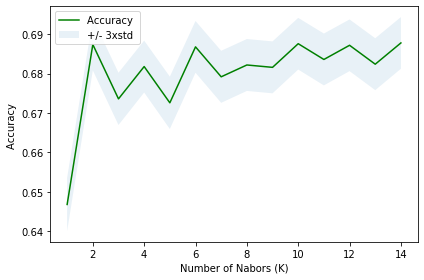

In [115]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [116]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.6878 with k= 14


In [117]:
# Building the model again, using k=14
from sklearn.neighbors import KNeighborsClassifier
k = 14
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

Support Vector Machine (SVM)

In [118]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train_res, y_train_res)

/Users/tarunabichandani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [120]:
yhat = SVM_model.predict(X_test)
yhat[0:25]

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2])

Logistic Regression (LR)

In [121]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train_res,y_train_res)
LR_model

/Users/tarunabichandani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
yhat = LR_model.predict(X_test)
yhat[0:25]

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2])

Model Evaluation

In [123]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [124]:
knn_yhat = kNN_model.predict(X_test)
print("KNN Jaccard index: %.4f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.4f" % f1_score(y_test, knn_yhat, average='weighted'))

KNN Jaccard index: 0.6844
KNN F1-score: 0.5780


/Users/tarunabichandani/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [125]:
SVM_yhat = SVM_model.predict(X_test)
print("SVM Jaccard index: %.4f" % jaccard_similarity_score(y_test, SVM_yhat))
print("SVM F1-score: %.4f" % f1_score(y_test, SVM_yhat, average='weighted'))

SVM Jaccard index: 0.4710
SVM F1-score: 0.4629


/Users/tarunabichandani/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [126]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR Jaccard index: %.4f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.4f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.4f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.4676
LR F1-score: 0.4563
LR LogLoss: 0.6656


/Users/tarunabichandani/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [127]:
results = {'ALGORITHM':['KNN','SVM','LOGLOSS'],\
         'Jaccard':\
         [jaccard_similarity_score(y_test, knn_yhat),\
          jaccard_similarity_score(y_test, SVM_yhat),\
          jaccard_similarity_score(y_test, LR_yhat)],\
        'F-1 Score':\
         [f1_score(y_test, knn_yhat, average='weighted'),\
          f1_score(y_test, SVM_yhat, average='weighted'),\
          f1_score(y_test, LR_yhat, average='weighted')],\
        'LogLoss':['NA','NA',log_loss(y_test, LR_yhat_prob)]}
df5 = pd.DataFrame(results)
df5.head()

/Users/tarunabichandani/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/Users/tarunabichandani/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/Users/tarunabichandani/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be 

,ALGORITHM,Jaccard,F-1 Score,LogLoss
0,KNN,0.6844,0.578031,NA
1,SVM,0.4710,0.462905,NA
2,LOGLOSS,0.4676,0.456333,0.66559


The KNN model predicts 70% of the times the severity level and a blip can be added on the side of the google maps when the severity level is predicted as 2.
A few places to improve the prediction:
 - rather than taking random sample of 50000 datasets, maybe take 100000 or all of the data set. Taking all of the data set was tried but the jupyter notebook took way longer to predict any results for the best k in the KNN model. Hence ranbdom sample of 50000 was taken for the models.
 - A few coloumns were dropped when converting columns into Dummy Variables. This was done to limit the number of columns to between 10-15. The columns such as others, unknown were dropped since the correlation was not relatable.